# TP 9 M-Moyennes et Analyse en Composantes Principales



# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from numpy import random
import cv2 as cv

# Partie 2 ACP

**** Rappel sur les valeurs propres et les vecteurs propres ****

In [ ]:
A= [[-1,2,0],[0,3,4],[0,0,7]]
B=[[-1,2,2],[2,2,-1],[1,-2,1]]
val1, vec1 = LA.eig(A)
val2, vec2 = LA.eig(B)

In [ ]:
print('Valeurs propres de A','\n',val1,'\n\n','Vecteurs propres de A','\n', np.round(vec1,2),'\n\n',
      'Valeurs propres de B','\n',val2,'\n\n','Vecteurs propres de B','\n',np.round(vec2,2))

Valeurs propres de A 
 [-1.  3.  7.] 

 Vecteurs propres de A 
 [[1.   0.45 0.17]
 [0.   0.89 0.7 ]
 [0.   0.   0.7 ]] 

 Valeurs propres de B 
 [-3.  2.  3.] 

 Vecteurs propres de B 
 [[-0.82  0.44 -0.  ]
 [ 0.41 -0.22 -0.71]
 [ 0.41  0.87  0.71]]


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(9, 4)

In [ ]:
X

array([[ 6. ,  6. ,  5. ,  5.5],
       [ 8. ,  8. ,  8. ,  8. ],
       [ 6. ,  7. , 11. ,  9.5],
       [14.5, 14.5, 15.5, 15. ],
       [14. , 14. , 12. , 12.5],
       [11. , 10. ,  5.5,  7. ],
       [ 5.5,  7. , 14. , 11.5],
       [13. , 12.5,  8.5,  9.5],
       [ 9. ,  9.5, 12.5, 12. ]])

In [ ]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)
std = np.std(X, axis=0)
print('Moyenne de X \n', np.round(m,2),'\n\n Variance de X \n', 
                                  np.round(v,2),'\n\n Ecart Type de X \n', np.round(std,2))

Moyenne de X 
 [ 9.67  9.83 10.22 10.06] 

 Variance de X 
 [11.39  8.94 12.06  7.91] 

 Ecart Type de X 
 [3.37 2.99 3.47 2.81]


In [ ]:
cov = np.cov(X.T)
print('Covariance de X \n',np.round(cov,2))

Covariance de X 
 [[12.81 11.16  2.99  5.43]
 [11.16 10.06  4.64  6.17]
 [ 2.99  4.64 13.57 10.45]
 [ 5.43  6.17 10.45  8.9 ]]


In [ ]:
valX, vecX = LA.eig(cov)
print('Valeurs propres de la matrice de covariance de X :','\n',np.round(valX,2),
      '\n\n','Pourcentage des valeurs propres de la matrice de covariance de X :' ,'\n',np.round(valX/np.sum(valX),2),
      '\n\n','Somme des Valeurs propres de la matrice de covariance de X :','\n', np.round(np.sum(valX),2),
     '\n\n','Vecteurs propres de la matrice de covariance de X :','\n', np.round(vecX,2))

Valeurs propres de la matrice de covariance de X : 
 [3.176e+01 1.353e+01 1.000e-02 4.000e-02] 

 Pourcentage des valeurs propres de la matrice de covariance de X : 
 [0.7 0.3 0.  0. ] 

 Somme des Valeurs propres de la matrice de covariance de X : 
 45.35 

 Vecteurs propres de la matrice de covariance de X : 
 [[-0.52 -0.57  0.61  0.19]
 [-0.51 -0.37 -0.63 -0.45]
 [-0.49  0.66  0.34 -0.46]
 [-0.48  0.33 -0.33  0.74]]


In [ ]:
projection=np.dot(X, vecX)
print(np.round(projection,2))

[[-11.26  -0.56  -0.26   0.19]
 [-16.     0.35  -0.11   0.14]
 [-16.66   4.32  -0.19  -0.05]
 [-29.73   1.45  -0.03   0.16]
 [-26.28  -1.2   -0.37   0.05]
 [-16.84  -4.07  -0.05   0.2 ]
 [-18.85   7.23  -0.15  -0.04]
 [-21.83  -3.35  -0.22  -0.08]
 [-21.42   3.48  -0.26   0.55]]


# Partie 1 K-Moyennes
dans cette partie nous allons appliquer l'algorithme des K-Moyennes afin de ségmenter une image.

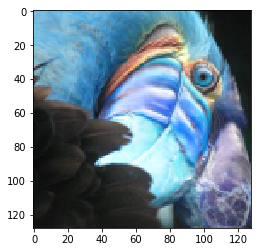

In [ ]:
image =cv.imread('bird_small.png')
plt.imshow(image)

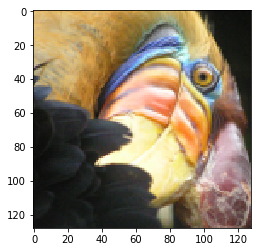

In [ ]:
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [ ]:
# définir K centres aléatoirement

def chooseCentroidsCoordinates(image,K):
    n=image.shape[0]
    m=image.shape[1]
    centers=np.zeros((K,2))
    for i in range (K):
        x=np.random.randint(0,n)
        y=np.random.randint(0,m)
        coordinates[i,:]=[x,y]
    return coordinates

In [ ]:
def chooseCentroids(image,coordinates):
    centers=image[coordinates[:,0].astype(int),coordinates[:,1].astype(int)]
    return centers

In [ ]:
def distanceEucl(image, centers):
    

In [ ]:
K=16
coordinates=chooseCentroidsCoordinates(image,K)
coordinates

array([[112.,  43.],
       [ 54.,  54.],
       [ 67., 127.],
       [ 70.,  60.],
       [  1.,  28.],
       [ 34.,   4.],
       [127.,   2.],
       [ 71.,  13.],
       [ 81.,  92.],
       [  6.,   6.],
       [ 58.,  52.],
       [ 45.,  99.],
       [ 17.,  41.],
       [ 22.,   6.],
       [ 46.,  62.],
       [ 83.,  57.]])

In [ ]:
centers = chooseCentroids(image,coordinates)
centers

array([[ 25,  28,  25],
       [195, 216, 254],
       [ 28,  27,  33],
       [218, 248, 253],
       [ 98, 175, 225],
       [134, 177, 188],
       [ 17,  19,  18],
       [ 34,  33,  35],
       [114, 186, 253],
       [126, 185, 214],
       [213, 218, 253],
       [121, 150, 153],
       [ 73, 150, 193],
       [109, 178, 212],
       [191, 188, 239],
       [195, 251, 254]], dtype=uint8)

In [ ]:
np.linalg.norm(image[0,0,:] - centers[0,0,:])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
centers[0]

array([25, 28, 25], dtype=uint8)

In [ ]:
a=image[0,0,:]
b=centers[0]
(a - b)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
a=image[0,0,:].T
b=centers[0,0,:].T
np.sqrt(numpy.sum(np.pow (a - b)))

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
image[0,0,:]

array([103, 180, 219], dtype=uint8)

# Travail à faire

Le travail restant à faire se fera en classe.


In [ ]:
# bonne chance